In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gen_matrix_F(n, vr):
    # Generate random matrix without diffusion
    I = np.eye(n)   # Identity matrix representing degradation
    mu = 0  # Mean
    B = mu + np.sqrt(vr) * np.random.randn(n, n)    # Random matrix generator, allowing diagonal term to be non-zero
    np.fill_diagonal(B, 0)
    A = -I + B  # Modified matrix form
    D = np.zeros((n, n))     # Initialize diffusion matrix
    return A, D    

In [3]:
rm = []         # random matrices 
for i in range(500):
    m = gen_matrix_F(100,0.01)[0]        # size, variance
    rm.append(m)


srm = []        # stable without diffusion
for m in rm:
    ev = np.linalg.eigvals(m)
    if np.max(np.real(ev)) < 0:
        srm.append(m)

D = gen_matrix_F(100,0.01)[1]         # diagonal matrix       
D[0, 0] = 1
D[1, 1] = 10
k = np.arange(0, 101, 0.2) 

In [4]:
# type 1a instability: matrices, real and imaginary eigenvalues
t1a = []
t1ar = []
t1ai = []
# type 1b instability: matrices, real and imaginary eigenvalues
t1b = []
t1br = []
t1bi = []
# type 2a instability: matrices, real and imaginary eigenvalues
t2a = []
t2ar = []
t2ai = []
# type 2b instability: matrices, real and imaginary eigenvalues
t2b = []
t2br = []
t2bi = []
#
turing_matrices = []

In [5]:


# Eigenvalues for type 1a and 1b instabilities for 1 matrix 
t1ars = []
t1ais = []
t1brs = []
t1bis = []

# list of wavelength values 
wavelength = []

# check for first succesfull case 
t1ar_t = True
t1ai_t = True
t1br_t = True
t1bi_t = True
wvl_cond = True

for m in srm:
    Em = []
    Emi = []
    real_e = []
    img_e = []
    kn = []         # list of wavelength classifications: < 1, 1, >1  
    for i in range(len(k)): 
        R = m - D * (k[i] ** 2)
        eigval = np.linalg.eigvals(R)
        Em.append(np.max(np.real(eigval)))
        idx_max = np.argmax(np.real(eigval))
        Emi.append(np.imag(eigval[idx_max]))
        real_e.extend(np.real(eigval))
        img_e.extend(np.imag(eigval))
        if k[i] < 1: 
            kn.extend(["< 1"]*len(np.real(eigval))) 
        elif k[i] == 1: 
            kn.extend(["1"]*len(np.real(eigval))) 
        else: 
            kn.extend(["> 1"]*len(np.real(eigval))) 
    a = np.max(Em)
    index = np.argmax(Em)
    nEm = np.array(Em)
    if a > 0:
        if Emi[index] == 0:
            numZeroCrossing = np.count_nonzero(np.diff(np.sign(Em)))                        # Count zero crossings
            numpositivelocalmaxima = np.sum(nEm[argrelextrema(nEm,np.greater)]>0) > 0       # Count positive local maxima 
            if numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 0:                     # condition for type 1a instability
                t1a.append(m)
                turing_matrices.append(m)
                t1ar.extend(Em)
                t1ai.extend(Emi)
                if t1ar_t:
                    t1ars.extend(real_e)
                    t1ar_t = False
                if t1ai_t:
                    t1ais.extend(img_e)
                    t1ai_t = False
                if wvl_cond:
                    wavelength.extend(kn) 
                    wvl_cond = False

            elif numpositivelocalmaxima > 0 and numZeroCrossing == 1:                       # condition for type 1b instability
                t1b.append(m)
                turing_matrices.append(m)
                t1br.extend(Em)
                t1bi.extend(Emi)
                if t1br_t:
                    t1brs.extend(real_e)
                    t1br_t = False
                if t1bi_t:
                    t1bis.extend(img_e)
                    t1bi_t = False
                if wvl_cond:
                    wavelength.extend(kn) 
                    wvl_cond = False
            elif numpositivelocalmaxima == 0 and numZeroCrossing % 2 == 1:                  # condition for type 2a instability
                t2a.append(m)
                t2ar.extend(Em)
                t2ai.extend(Emi)
            elif numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 1:                   # condition for type 2b instability
                t2b.append(m)
                t2br.extend(Em)
                t2bi.extend(Emi)
                    
print(len(t1a), "type 1a instabilities")
print(len(t1b), "type 1b instabilities")
print(len(t2a), "type 2a instabilities")
print(len(t2b), "type 2b instabilities")

2 type 1a instabilities
3 type 1b instabilities
10 type 2a instabilities
0 type 2b instabilities


In [22]:
data_dict = {'Re(\u03bb\u2096)': real, 'Im(\u03bb\u2096)': img,'K': wavelength}
df = pd.DataFrame(data_dict)
def transform_value(value):
    if value == '1':
        return 'k = 1'
    elif value == '< 1':
        return 'k < 1'
    elif value == '> 1':
        return 'k > 1'
    else:
        return value  # Handle other cases if needed

# Apply the transformation to the last column
df['K'] = df['K'].apply(transform_value)

df.head()

,Re(λₖ),Im(λₖ),K
0,-0.508783,0.896277,k < 1
1,-0.508783,-0.896277,k < 1
2,-0.003793,0.000000,k < 1
3,-1.854734,0.502092,k < 1
4,-1.854734,-0.502092,k < 1


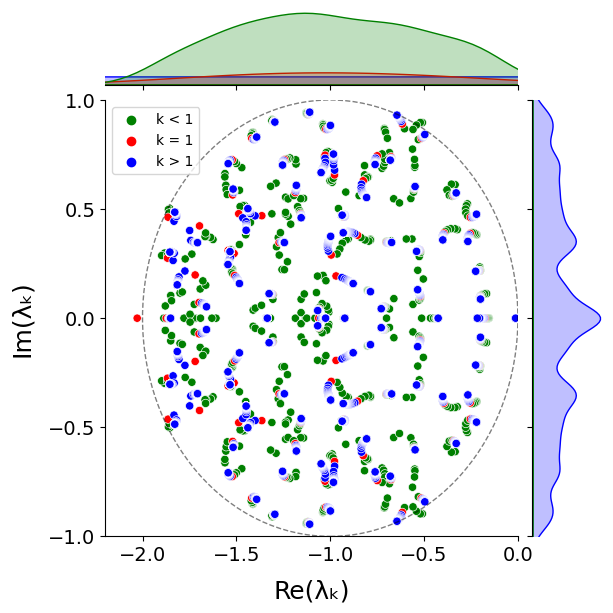

In [47]:
import matplotlib.patches as patches
real = []
img = []
real.extend(t1ars)
img.extend(t1ais)

# Create a DataFrame
# Create a joint plot with Seaborn

custom_palette = {'k = 1': 'red', 'k > 1': 'blue', 'k < 1': 'green'}
g = sns.jointplot(data=df, x='Re(\u03bb\u2096)', y='Im(\u03bb\u2096)',hue='K', legend=True, ylim=(-1,1), xlim=(-2.2,0), palette=custom_palette)
g.set_axis_labels('Re(\u03bb\u2096)', 'Im(\u03bb\u2096)', fontsize=18, labelpad=10)
#g.ax_joint.set_xticks([-2, -1.5, -1, -0.5, 0])
g.ax_joint.set_yticks([-1, -0.5, 0, 0.5, 1])
g.ax_joint.set_xticks([-2, -1.5, -1, -0.5, 0])

circle = patches.Circle((-1, 0), radius=1, edgecolor='black', facecolor='none', linestyle='dashed', alpha=0.5)
g.ax_joint.add_patch(circle)
g.ax_joint.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title=None)
plt.show()

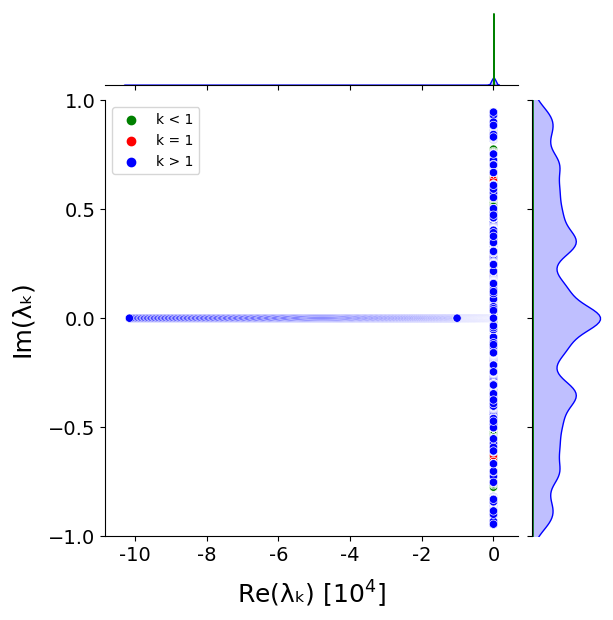

In [48]:
g = sns.jointplot(data=df, x='Re(\u03bb\u2096)', y='Im(\u03bb\u2096)',hue='K', legend=True, ylim=(-1,1), palette=custom_palette)
g.set_axis_labels('Re(\u03bb\u2096) [$10^4$]', 'Im(\u03bb\u2096)', fontsize=18,labelpad=10)
g.ax_joint.set_yticks([-1, -0.5, 0, 0.5, 1])
plt.xticks([-100000,-80000,-60000,-40000,-20000,0], [-10,-8,-6,-4,-2,0])
g.ax_joint.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title=None)
plt.show()